## Biblioteca
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_gpt_judge = pd.read_csv('result_judge_gpt.csv')
data_gemini_judge = pd.read_csv('result_judge_gemini.csv')
data_gpt_the_huxley = pd.read_csv('result_the_huxley_gpt_code.csv')
data_gemini_the_huxley = pd.read_csv('result_the_huxley_gemini_code.csv')

In [3]:
def plot_evaluation_comparison(df1, df2, name1='Model 1', name2='Model 2'):
    counts1 = df1['evaluation'].value_counts()
    counts2 = df2['evaluation'].value_counts()

    comparison_df = pd.DataFrame({name1: counts1, name2: counts2})
    comparison_df = comparison_df.fillna(0).astype(int)
    
    print("Dados consolidados para o gráfico:")
    print(comparison_df)

    fig, ax = plt.subplots(figsize=(12, 7))

    comparison_df.plot(kind='bar', ax=ax, width=0.8, 
                       color={name1: '#4285F4', name2: '#34A853'})

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

    ax.set_title(f'Comparativo de Avaliações: {name1} vs. {name2}', fontsize=16, pad=20)
    ax.set_ylabel('Quantidade de Respostas', fontsize=12)
    ax.set_xlabel('Tipo de Avaliação', fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    
    plt.show()

In [4]:
def plot_nivel_bar(df1, df2, name1='Model 1', name2='Model 2'):
    counts1 = df1['nivel'].value_counts()
    counts2 = df2['nivel'].value_counts()

    comparison_df = pd.DataFrame({name1: counts1, name2: counts2})
    comparison_df = comparison_df.fillna(0).astype(int)
    
    order = ['Fácil', 'Médio', 'Difícil']
    comparison_df = comparison_df.reindex(order).fillna(0)

    print("Dados consolidados para o gráfico de Nível:")
    print(comparison_df)

    fig, ax = plt.subplots(figsize=(12, 7))

    comparison_df.plot(kind='bar', ax=ax, width=0.8,
                       color={name1: '#FFC107', name2: '#F44336'})

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

    ax.set_title(f'Comparativo por Nível de Dificuldade: {name1} vs. {name2}', fontsize=16, pad=20)
    ax.set_ylabel('Quantidade de Problemas', fontsize=12)
    ax.set_xlabel('Nível de Dificuldade', fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

#### Comparação - GPT JUDGE (GEMINI CODE) x THE HUXLEY (GEMINI CODE)
---

In [5]:
data_gemini_the_huxley

,id,name,time,evaluation
0,54,Banda,0.004131,CORRECT
1,812,Saldo de gols,0.004158,CORRECT
2,684,Carteiro,0.027707,CORRECT
3,814,Dominó,0.002084,CORRECT
4,817,Chuva (OBI),0.046885,CORRECT
5,813,Macaco prego,0.016512,WRONG_ANSWER
6,2201,Piso,0.002152,WRONG_ANSWER
7,3598,Idade,0.002392,WRONG_ANSWER
8,373,Capital,0.001850,WRONG_ANSWER
9,3599,Sequência Secreta,0.002347,CORRECT


In [6]:
data_gpt_judge

,id,name,time,evaluation,nivel
0,54,Banda,0.003,CORRECT,Fácil
1,812,Saldo de gols,-1.000,EMPTY_ANSWER,Médio
2,684,Carteiro,-1.000,COMPILATION_ERROR,Médio
3,814,Dominó,0.015,CORRECT,NaN
4,817,Chuva (OBI),-1.000,EMPTY_ANSWER,Médio
5,813,Macaco prego,0.011,CORRECT,Médio
6,2201,Piso,0.007,CORRECT,Médio
7,3598,Idade,0.004,CORRECT,Fácil
8,373,Capital,-1.000,EMPTY_ANSWER,Médio
9,3599,Sequência Secreta,0.005,CORRECT,Fácil


Dados consolidados para o gráfico:
                   GPT 4.1 JUDGE  THE HUXLEY JUDGE
evaluation                                        
COMPILATION_ERROR              2                 1
CORRECT                        7                 7
EMPTY_ANSWER                   4                 0
WRONG_ANSWER                   0                 5


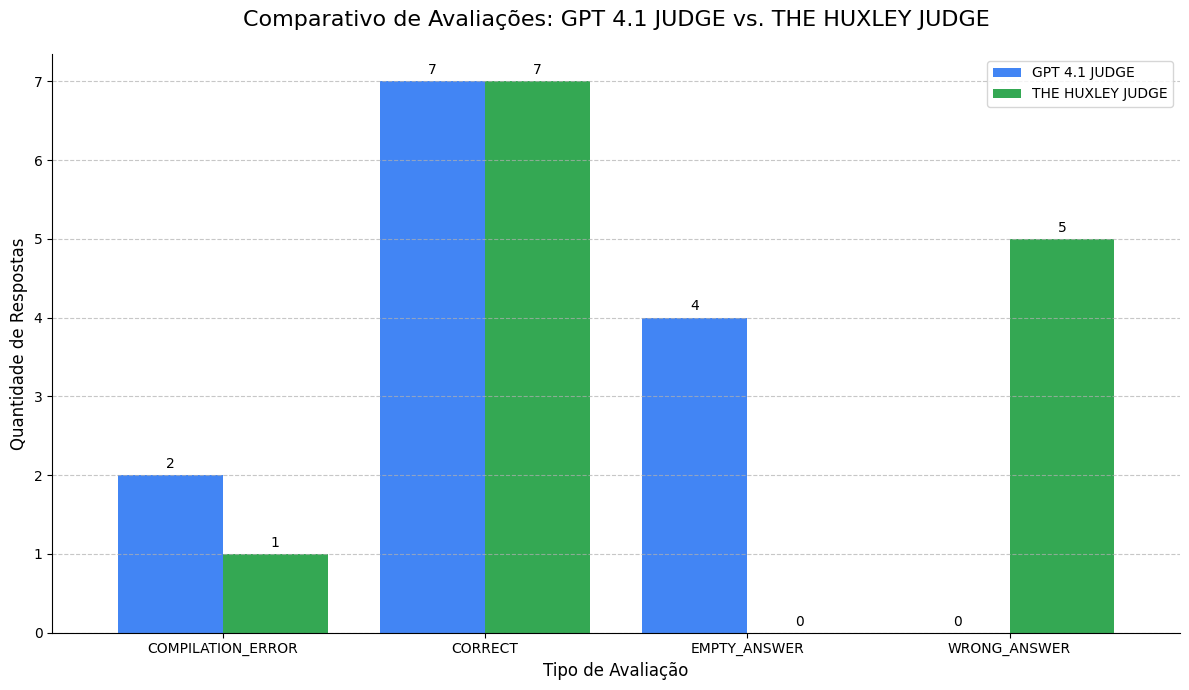

In [7]:
plot_evaluation_comparison(data_gpt_judge, data_gemini_the_huxley, "GPT 4.1 JUDGE", "THE HUXLEY JUDGE")

In [8]:
for index, row in data_gpt_judge[data_gpt_judge['evaluation'] != data_gemini_the_huxley['evaluation']].iterrows():
    value = f"{row['id']}: {row['name']};"
    value += f" JUDGE GPT: {row['evaluation']}"
    value += " | JUDGE THE HUXLEY: "
    value += data_gemini_the_huxley[row['id'] == data_gemini_the_huxley['id']]['evaluation'].iloc[0]

    print(value)
    

812: Saldo de gols; JUDGE GPT: EMPTY_ANSWER | JUDGE THE HUXLEY: CORRECT
684: Carteiro; JUDGE GPT: COMPILATION_ERROR | JUDGE THE HUXLEY: CORRECT
817: Chuva (OBI); JUDGE GPT: EMPTY_ANSWER | JUDGE THE HUXLEY: CORRECT
813: Macaco prego; JUDGE GPT: CORRECT | JUDGE THE HUXLEY: WRONG_ANSWER
2201: Piso; JUDGE GPT: CORRECT | JUDGE THE HUXLEY: WRONG_ANSWER
3598: Idade; JUDGE GPT: CORRECT | JUDGE THE HUXLEY: WRONG_ANSWER
373: Capital; JUDGE GPT: EMPTY_ANSWER | JUDGE THE HUXLEY: WRONG_ANSWER
3601: Distância entre amigos; JUDGE GPT: EMPTY_ANSWER | JUDGE THE HUXLEY: COMPILATION_ERROR
4662: Victor Hugo e a Task Final; JUDGE GPT: COMPILATION_ERROR | JUDGE THE HUXLEY: WRONG_ANSWER


#### Comparação - GEMINI JUDGE (GPT CODE) x THE HUXLEY (GEMINI CODE)
---

In [9]:
data_gpt_the_huxley

,id,name,time,evaluation
0,54,Banda,0.004238,CORRECT
1,812,Saldo de gols,0.005594,CORRECT
2,684,Carteiro,0.056706,CORRECT
3,814,Dominó,0.002085,CORRECT
4,817,Chuva (OBI),-1.000000,COMPILATION_ERROR
5,813,Macaco prego,0.016956,CORRECT
6,2201,Piso,0.003710,WRONG_ANSWER
7,3598,Idade,0.002326,WRONG_ANSWER
8,373,Capital,0.002162,WRONG_ANSWER
9,3599,Sequência Secreta,0.002675,CORRECT


In [10]:
data_gemini_judge

,id,name,time,evaluation,nivel
0,54,Banda,0.021,CORRECT,Fácil
1,812,Saldo de gols,0.001,CORRECT,Médio
2,684,Carteiro,0.042,CORRECT,Médio
3,814,Dominó,0.001,CORRECT,Médio
4,817,Chuva (OBI),0.081s,CORRECT,Médio
5,813,Macaco prego,0.004,WRONG_ANSWER,Médio
6,2201,Piso,0.000s,WRONG_ANSWER,Médio
7,3598,Idade,0.000s,WRONG_ANSWER,Fácil
8,373,Capital,0.001,CORRECT,Médio
9,3599,Sequência Secreta,0.001s,CORRECT,Fácil


Dados consolidados para o gráfico:
                   GPT 4.1 JUDGE  THE HUXLEY JUDGE
evaluation                                        
COMPILATION_ERROR              0                 1
CORRECT                        8                 6
WRONG_ANSWER                   5                 6


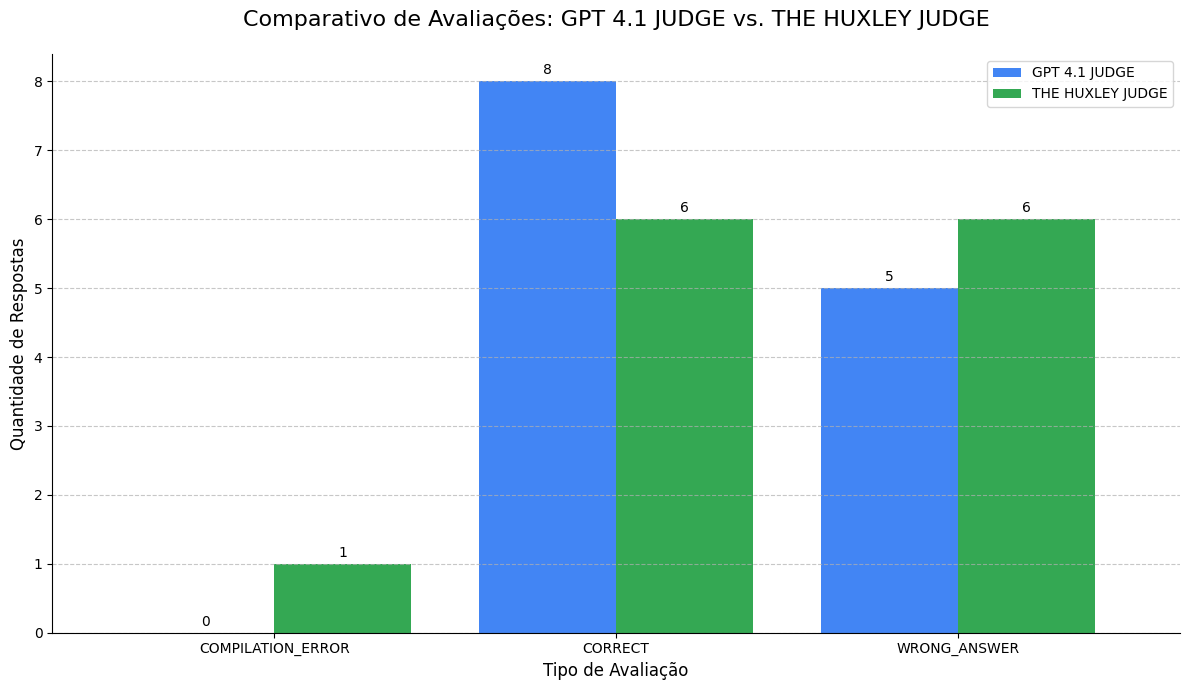

In [11]:
plot_evaluation_comparison(data_gemini_judge, data_gpt_the_huxley, "GPT 4.1 JUDGE", "THE HUXLEY JUDGE")

In [12]:
for index, row in data_gemini_judge[data_gemini_judge['evaluation'] != data_gpt_the_huxley['evaluation']].iterrows():
    value = f"{row['id']}: {row['name']};"
    value += f" JUDGE GPT: {row['evaluation']}"
    value += " | JUDGE THE HUXLEY: "
    value += data_gemini_the_huxley[row['id'] == data_gemini_the_huxley['id']]['evaluation'].iloc[0]

    print(value)
    

817: Chuva (OBI); JUDGE GPT: CORRECT | JUDGE THE HUXLEY: CORRECT
813: Macaco prego; JUDGE GPT: WRONG_ANSWER | JUDGE THE HUXLEY: WRONG_ANSWER
373: Capital; JUDGE GPT: CORRECT | JUDGE THE HUXLEY: WRONG_ANSWER
176: Times; JUDGE GPT: CORRECT | JUDGE THE HUXLEY: CORRECT


### Nível de dificuldade segundo as LLMs
---

Dados consolidados para o gráfico de Nível:
         Gemini Pro 2.5  GPT 4.1
nivel                           
Fácil                 4        5
Médio                 8        6
Difícil               1        1


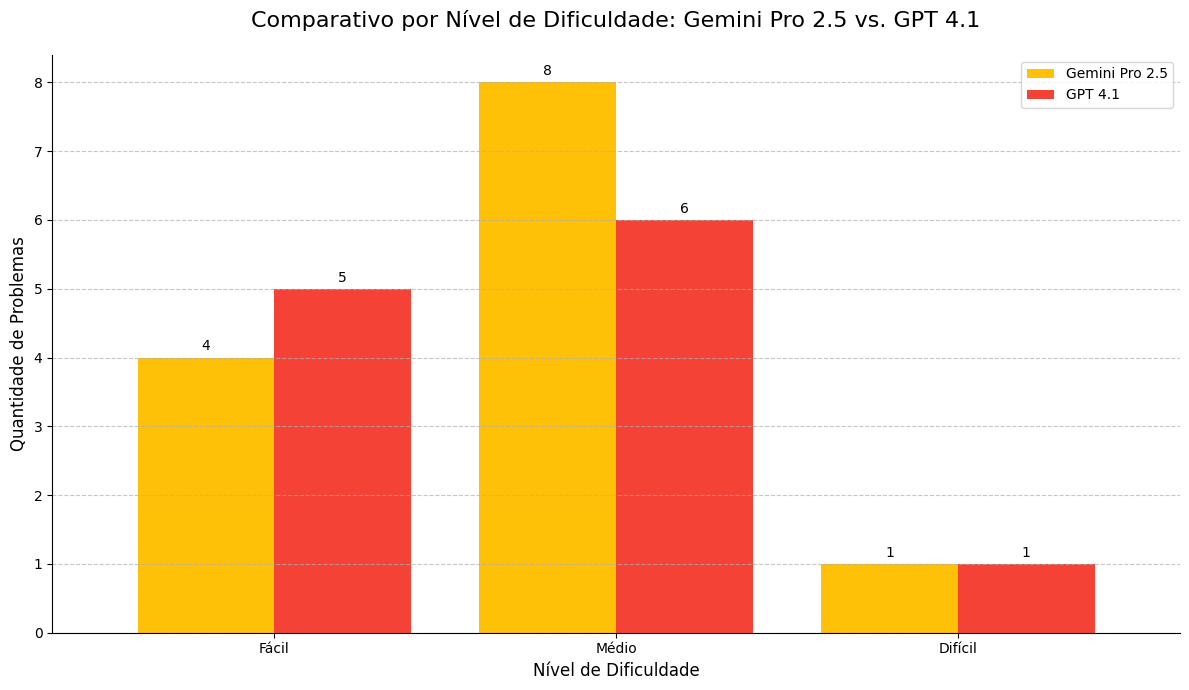

In [13]:
plot_nivel_bar(data_gemini_judge, data_gpt_judge, name1 = "Gemini Pro 2.5", name2 = "GPT 4.1")